## Question 1)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("C:/Users/hp/Downloads/ML_LAB/ML_Lab-7/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data = data.drop("Id", axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
value_counts = data['Species'].value_counts()
print(value_counts)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [15]:
X = data.drop("Species", axis=1)
X.shape

(150, 4)

In [17]:
Y = data['Species'].astype('category').cat.codes
value_counts = Y.value_counts()
print(value_counts)

0    50
1    50
2    50
Name: count, dtype: int64


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=data['Species'], random_state=1)
value_counts1 = Y_train.value_counts()
value_counts2= Y_test.value_counts()
print(value_counts1)
print(value_counts2)

0    40
2    40
1    40
Name: count, dtype: int64
2    10
0    10
1    10
Name: count, dtype: int64


In [21]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(120, 4) (120,) (30, 4) (30,)


### Gini Index :

In [24]:
clf = DecisionTreeClassifier(criterion='gini', random_state=100)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=100)

In [26]:
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", round(accuracy*100))

Accuracy: 97


In [28]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [30]:
report = classification_report(Y_test, Y_pred, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print("Classification Report:\n", report)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



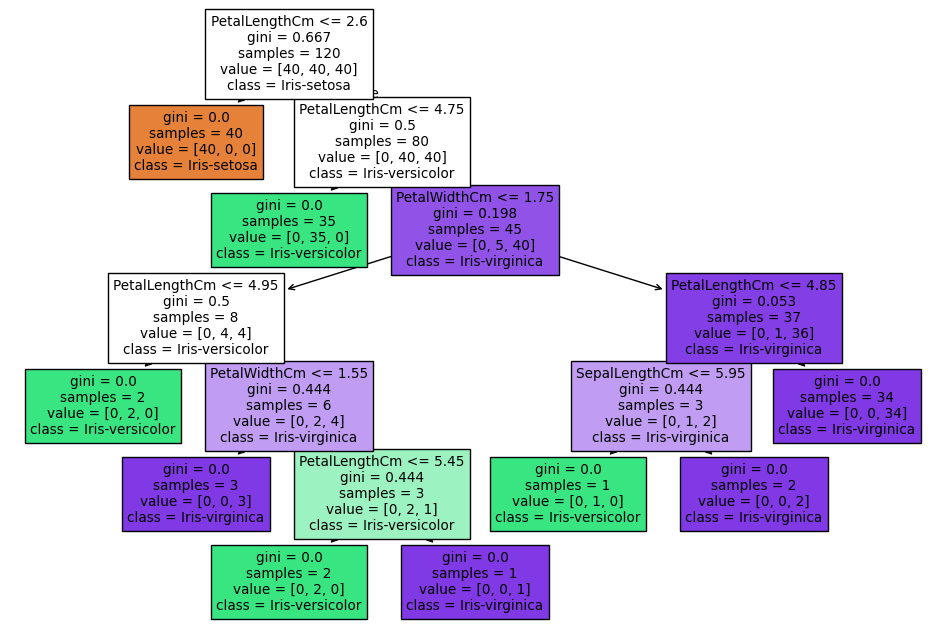

In [32]:
#Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled=True)
plt.show()

### Entropy:

In [35]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=100)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [37]:
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", round(accuracy*100))

Accuracy: 97


In [39]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [41]:
report = classification_report(Y_test, Y_pred, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print("Classification Report:\n", report)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



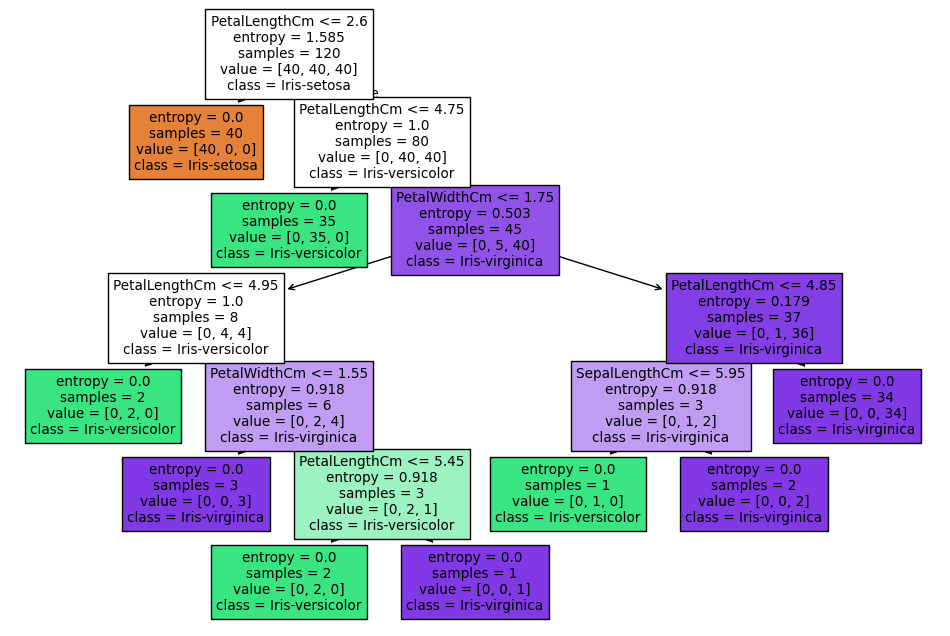

In [43]:
#Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled=True)
plt.show()

### Inference:

The decision tree built using both Gini Index and Entropy reveals that petal length and petal width are the most influential features in accurately classifying Iris species, where both criteria produce similar tree structures and classification accuracy, but Gini is computationally more efficient while Entropy provides a more detailed measure of information gain.








## Question 2)

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
data = pd.read_csv("C:/Users/hp/Downloads/ML_LAB/Ml_Lab_9/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [54]:
X = data.drop("Outcome", axis=1)
X.shape

(768, 8)

In [56]:
Y = data["Outcome"]
Y.shape

(768,)

In [58]:
value_counts = Y.value_counts()
print(value_counts)

Outcome
0    500
1    268
Name: count, dtype: int64


In [60]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [62]:
value_counts = Y_resampled.value_counts()
print(value_counts)

Outcome
1    500
0    500
Name: count, dtype: int64


In [64]:
print(X_resampled.shape, Y_resampled.shape)

(1000, 8) (1000,)


In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, stratify = Y_resampled, random_state=1)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(800, 8) (800,) (200, 8) (200,)


In [68]:
value_counts1 = Y_train.value_counts()
value_counts2= Y_test.value_counts()
print(value_counts1)
print(value_counts2)

Outcome
1    400
0    400
Name: count, dtype: int64
Outcome
0    100
1    100
Name: count, dtype: int64


### 20 trees:

In [71]:
clf = RandomForestClassifier(n_estimators = 20, random_state=42)  
clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [73]:
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", round(accuracy*100))

Accuracy: 78


In [75]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[79 21]
 [22 78]]


In [77]:
report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       100
           1       0.79      0.78      0.78       100

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200



### 100 Tree:

In [80]:
clf = RandomForestClassifier(n_estimators = 100, random_state=42)  
clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [82]:
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", round(accuracy*100))

Accuracy: 81


In [84]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[79 21]
 [17 83]]


In [86]:
report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       100
           1       0.80      0.83      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



### Inference:

With 20 Trees:
The Random Forest with 20 trees gives reasonably good accuracy by combining predictions from fewer trees, but may slightly underperform due to less voting stability.

With 100 Trees:
The Random Forest with 100 trees improves prediction reliability and accuracy through stronger majority voting, reducing variance and overfitting risk.